In [1]:
from datetime import date
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_columns',None)

In [2]:
data=pd.read_csv(r"C:\Users\saurabh srivastava\Desktop\evaluation phase\Automobile_insurance_fraud.csv")
data

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip insured_sex insured_education_level insured_occupation  \
0         466132        MALE                      MD       craft-repair   
1         468176        MALE                      MD  machine-op-inspct   
2         430632      FEMALE                     PhD              sales   
3         608117      FEMALE                     PhD       armed-forces   
4         610706        MALE               Associate              sales   
..           ...         ...                     ...                ...   
995       431289      FEMALE                 Masters       craft-repair   
996       608177      FEMALE                     PhD     prof-specialty   
997       442797      FEMALE                 Masters       armed-forces   
998       441714        MALE               Associate  handlers-cleaners   
999       612260      FEMALE               Associate              sales   

    insured_hobbies insured_relationship  capital-gains  capital-loss  \
0          sleeping              husband          53300             0   
1           reading       other-relative              0             0   
2       board-games            own-child          35100             0   
3       board-games            unmarried          48900        -62400   
4       board-games            unmarried          66000        -46000   
..              ...                  ...            ...           ...   
995       paintball            unmarried              0             0   
996        sleeping                 wife          70900             0   
997  bungie-jumping       other-relative          35100             0   
998    base-jumping                 wife              0             0   
999        kayaking              husband              0             0   

    incident_date             incident_type   collision_type  \
0      25-01-2015  Single Vehicle Collision   Side Collision   
1      21-01-2015             Vehicle Theft                ?   
2      22-02-2015   Multi-vehicle Collision   Rear Collision   
3      10-01-2015  Single Vehicle Collision  Front Collision   
4      17-02-2015             Vehicle Theft                ?   
..   

In [3]:
data.shape

(1000, 40)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [5]:
for i in data.columns:
    if data[i].dtype==object:
        print(str(i)+" : "+str(data[i].unique()))
        print(data[i].value_counts())
        print('...................................')

policy_bind_date : ['17-10-2014' '27-06-2006' '06-09-2000' '25-05-1990' '06-06-2014'
 '12-10-2006' '04-06-2000' '03-02-1990' '05-02-1997' '25-07-2011'
 '26-05-2002' '29-05-1999' '20-11-1997' '26-10-2012' '28-12-1998'
 '19-10-1992' '08-06-2005' '15-11-2004' '28-12-2014' '02-08-1992'
 '25-06-2002' '27-11-2005' '27-05-1994' '08-02-1991' '02-02-1996'
 '05-12-2013' '20-09-1990' '18-07-2002' '08-02-1990' '04-03-2014'
 '18-02-2000' '19-06-2008' '01-08-2003' '04-04-1992' '13-01-1991'
 '08-08-2010' '09-03-2003' '03-02-1993' '25-11-2002' '27-07-1997'
 '08-05-1995' '30-08-2012' '30-04-2006' '13-04-2003' '05-12-2007'
 '21-08-2006' '08-01-1990' '18-03-1990' '07-01-2008' '10-03-1997'
 '10-01-2004' '20-08-1994' '02-06-2002' '28-04-1994' '17-08-2014'
 '11-08-2007' '20-11-2008' '18-10-1995' '19-05-1993' '26-02-2005'
 '14-02-1990' '30-09-1993' '10-06-2014' '28-10-2008' '24-04-2007'
 '13-12-1993' '17-08-2011' '20-08-1990' '11-02-1994' '22-02-1994'
 '15-08-2011' '11-11-1998' '04-12-1995' '28-12-2002' '15-

In [6]:
data.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [7]:
data.dropna(axis=1,inplace=True)

In [8]:
data

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip insured_sex insured_education_level insured_occupation  \
0         466132        MALE                      MD       craft-repair   
1         468176        MALE                      MD  machine-op-inspct   
2         430632      FEMALE                     PhD              sales   
3         608117      FEMALE                     PhD       armed-forces   
4         610706        MALE               Associate              sales   
..           ...         ...                     ...                ...   
995       431289      FEMALE                 Masters       craft-repair   
996       608177      FEMALE                     PhD     prof-specialty   
997       442797      FEMALE                 Masters       armed-forces   
998       441714        MALE               Associate  handlers-cleaners   
999       612260      FEMALE               Associate              sales   

    insured_hobbies insured_relationship  capital-gains  capital-loss  \
0          sleeping              husband          53300             0   
1           reading       other-relative              0             0   
2       board-games            own-child          35100             0   
3       board-games            unmarried          48900        -62400   
4       board-games            unmarried          66000        -46000   
..              ...                  ...            ...           ...   
995       paintball            unmarried              0             0   
996        sleeping                 wife          70900             0   
997  bungie-jumping       other-relative          35100             0   
998    base-jumping                 wife              0             0   
999        kayaking              husband              0             0   

    incident_date             incident_type   collision_type  \
0      25-01-2015  Single Vehicle Collision   Side Collision   
1      21-01-2015             Vehicle Theft                ?   
2      22-02-2015   Multi-vehicle Collision   Rear Collision   
3      10-01-2015  Single Vehicle Collision  Front Collision   
4      17-02-2015             Vehicle Theft                ?   
..   

In [9]:
for i in data.columns:
    if data[i].dtype!=object:
        print(str(i)+" : "+str(data[i].unique()))
        print(data[i].value_counts())
        print('...................................')

months_as_customer : [328 228 134 256 137 165  27 212 235 447  60 121 180 473  70 140 160 196
 460 217 370 413 237   8 257 202 224 241  64 166 155 114 149 147  62 289
 431 199  79 116  37 106 269 265 163 355 175 192 430  91 223 195  22 439
  94  11 151 154 245 119 215 295 254 107 478 128 338 271 222 120 270 319
 194 227 244  78 200 284 275 153  31  41 127  61 207 219  80 325  29 239
 279 350 464 118 298  87 261 453 210 168 390 258 225 164 255 206 203 211
 274  81 280 112  24  93 171 124 287 122 398 214 209  82 193 288 104 101
 375 461 428  45 136 216 278 108  14 276  47  73 294 324  53 426 111  86
 296 125 177 238 449 252 359  19 285  30 342 468 343 404  63 335 142 272
  69  38 281 246 330 362 371 377 172  99 249 190 174  95   2 117 242 440
  20 208 156 232  84 394  35 369 332 243 264  32 259 186 201 436 189 105
  88  40  59  39 123 231 247  48 267 286 253  10 158   1  85 233 266  97
 399 305 129 283  96 176 159 290 299  66 334 429  15 230 250  65 475  77
 229 110 292 451 150 291 162 3

In [10]:
data['policy_bind_day']=pd.to_datetime(data.policy_bind_date,format="%d-%m-%Y").dt.day

In [11]:
data['policy_bind_month']=pd.to_datetime(data.policy_bind_date,format="%d-%m-%Y").dt.month

In [12]:
data['policy_bind_year']=pd.to_datetime(data.policy_bind_date,format="%d-%m-%Y").dt.year

In [13]:
data['incident_day']=pd.to_datetime(data.incident_date,format="%d-%m-%Y").dt.day

In [14]:
data['incident_month']=pd.to_datetime(data.incident_date,format="%d-%m-%Y").dt.month

In [15]:
data['incident_year']=pd.to_datetime(data.incident_date,format="%d-%m-%Y").dt.year

In [16]:
data.drop

<bound method DataFrame.drop of      months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_a

In [17]:
data

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip insured_sex insured_education_level insured_occupation  \
0         466132        MALE                      MD       craft-repair   
1         468176        MALE                      MD  machine-op-inspct   
2         430632      FEMALE                     PhD              sales   
3         608117      FEMALE                     PhD       armed-forces   
4         610706        MALE               Associate              sales   
..           ...         ...                     ...                ...   
995       431289      FEMALE                 Masters       craft-repair   
996       608177      FEMALE                     PhD     prof-specialty   
997       442797      FEMALE                 Masters       armed-forces   
998       441714        MALE               Associate  handlers-cleaners   
999       612260      FEMALE               Associate              sales   

    insured_hobbies insured_relationship  capital-gains  capital-loss  \
0          sleeping              husband          53300             0   
1           reading       other-relative              0             0   
2       board-games            own-child          35100             0   
3       board-games            unmarried          48900        -62400   
4       board-games            unmarried          66000        -46000   
..              ...                  ...            ...           ...   
995       paintball            unmarried              0             0   
996        sleeping                 wife          70900             0   
997  bungie-jumping       other-relative          35100             0   
998    base-jumping                 wife              0             0   
999        kayaking              husband              0             0   

    incident_date             incident_type   collision_type  \
0      25-01-2015  Single Vehicle Collision   Side Collision   
1      21-01-2015             Vehicle Theft                ?   
2      22-02-2015   Multi-vehicle Collision   Rear Collision   
3      10-01-2015  Single Vehicle Collision  Front Collision   
4      17-02-2015             Vehicle Theft                ?   
..   

In [18]:
data.drop(columns=['policy_bind_date','incident_date'],axis=1,inplace=True)

In [19]:
data

months_as_customer  age  policy_number policy_state policy_csl  \
0                   328   48         521585           OH    250/500   
1                   228   42         342868           IN    250/500   
2                   134   29         687698           OH    100/300   
3                   256   41         227811           IL    250/500   
4                   228   44         367455           IL   500/1000   
..                  ...  ...            ...          ...        ...   
995                   3   38         941851           OH   500/1000   
996                 285   41         186934           IL    100/300   
997                 130   34         918516           OH    250/500   
998                 458   62         533940           IL   500/1000   
999                 456   60         556080           OH    250/500   

     policy_deductable  policy_annual_premium  umbrella_limit  insured_zip  \
0                 1000                1406.91               0       466132   
1                 2000                1197.22         5000000       468176   
2                 2000                1413.14         5000000       430632   
3                 2000                1415.74         6000000       608117   
4                 1000                1583.91         6000000       610706   
..                 ...                    ...             ...          ...   
995               1000                1310.80               0       431289   
996               1000                1436.79               0       608177   
997                500                1383.49         3000000       442797   
998               2000                1356.92         5000000       441714   
999               1000                 766.19               0       612260   

    insured_sex insured_education_level insured_occupation insured_hobbies  \
0          MALE                      MD       craft-repair        sleeping   
1          MALE                      MD  machine-op-inspct         reading   
2        FEMALE                     PhD              sales     board-games   
3        FEMALE                     PhD       armed-forces     board-games   
4          MALE               Associate              sales     board-games   
..          ...                     ...                ...             ...   
995      FEMALE                 Masters       craft-repair       paintball   
996      FEMALE                     PhD     prof-specialty        sleeping   
997      FEMALE                 Masters       armed-forces  bungie-jumping   
998        MALE               Associate  handlers-cleaners    base-jumping   
999      FEMALE               Associate              sales        kayaking   

    insured_relationship  capital-gains  capital-loss  \
0                husband          53300             0   
1         other-relative              0             0   
2              own-child          35100             0   
3              unmarried          48900        -62400   
4              unmarried          66000        -46000   
..                   ...            ...           ...   
995            unmarried              0             0   
996                 wife          70900             0   
997       other-relative          35100             0   
998                 wife              0             0   
999              husband              0             0   

                incident_type   collision_type incident_severity  \
0    Single Vehicle Collision   Side Collision      Major Damage   
1               Vehicle Theft                ?      Minor Damage   
2     Multi-vehicle Collision   Rear Collision      Minor Damage   
3    Single Vehicle Collision  Front Collision      Major Damage   
4               Vehicle Theft                ?      Minor Damage   
..                        ...              ...               ...   
995  Single Vehicle Collision  Front Collision      Minor Damage   
996  Single Vehicle Collision   Rear Collision   

In [20]:
cat=[]
for i in data.columns:
    if data[i].dtype==object:
        cat.append(i)
cat

['policy_state',
 'policy_csl',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'incident_location',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model',
 'fraud_reported']

In [21]:
num=[]
for i in data.columns:
    if data[i].dtype!=object:
        num.append(i)
num

['months_as_customer',
 'age',
 'policy_number',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'insured_zip',
 'capital-gains',
 'capital-loss',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_year',
 'policy_bind_day',
 'policy_bind_month',
 'policy_bind_year',
 'incident_day',
 'incident_month',
 'incident_year']

<AxesSubplot:xlabel='policy_state', ylabel='count'>

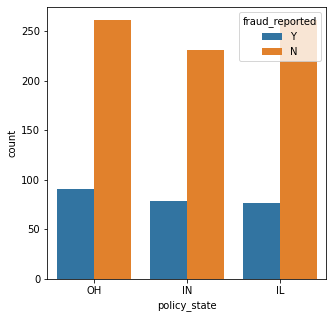

In [22]:
plt.figure(figsize=(5,5))
sns.countplot('policy_state',hue='fraud_reported',data=data)

<AxesSubplot:xlabel='policy_csl', ylabel='count'>

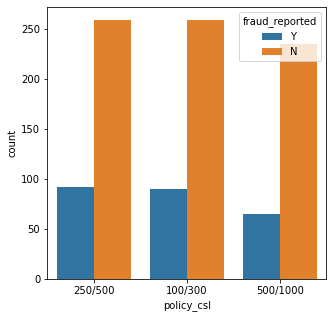

In [23]:
plt.figure(figsize=(5,5))
sns.countplot('policy_csl',hue='fraud_reported',data=data)

<AxesSubplot:xlabel='insured_sex', ylabel='count'>

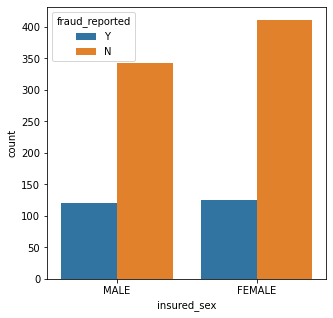

In [24]:
plt.figure(figsize=(5,5))
sns.countplot('insured_sex',hue='fraud_reported',data=data)

<AxesSubplot:xlabel='insured_education_level', ylabel='count'>

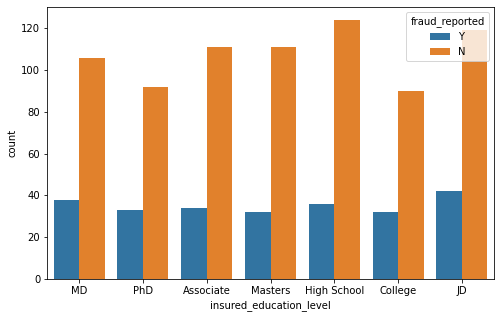

In [25]:
plt.figure(figsize=(8,5))
sns.countplot('insured_education_level',hue='fraud_reported',data=data)

<AxesSubplot:xlabel='insured_occupation', ylabel='count'>

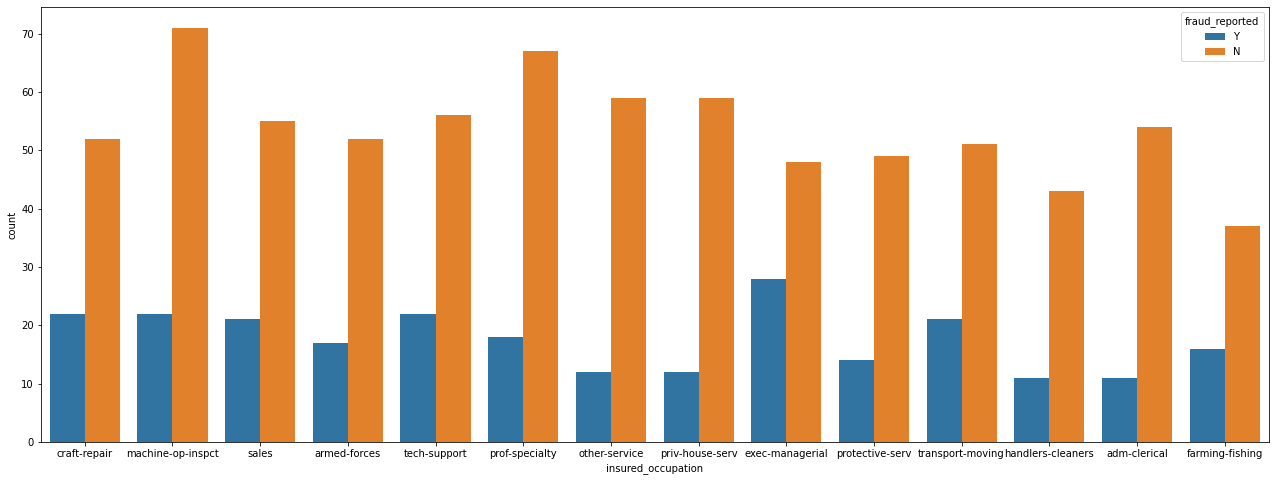

In [26]:
plt.figure(figsize=(22,8))
sns.countplot('insured_occupation',hue='fraud_reported',data=data)

<AxesSubplot:xlabel='insured_hobbies', ylabel='count'>

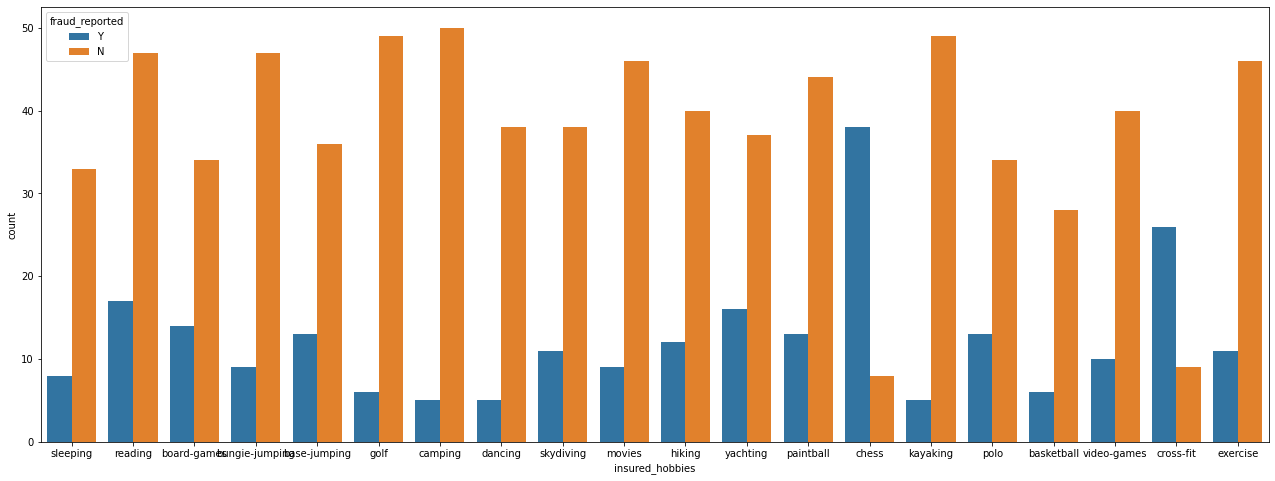

In [27]:
plt.figure(figsize=(22,8))
sns.countplot('insured_hobbies',hue='fraud_reported',data=data)

<AxesSubplot:xlabel='insured_relationship', ylabel='count'>

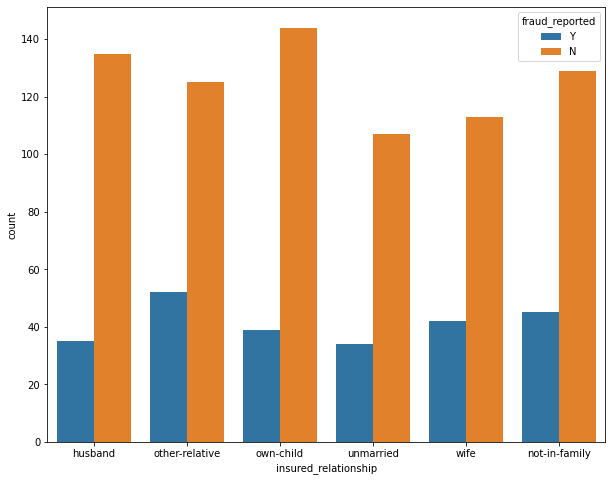

In [28]:
plt.figure(figsize=(10,8))
sns.countplot('insured_relationship',hue='fraud_reported',data=data)

<AxesSubplot:xlabel='incident_type', ylabel='count'>

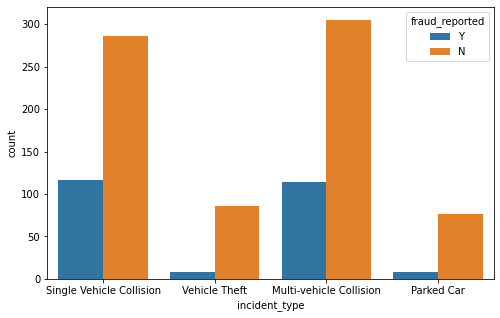

In [29]:
plt.figure(figsize=(8,5))
sns.countplot('incident_type',hue='fraud_reported',data=data)

<AxesSubplot:xlabel='collision_type', ylabel='count'>

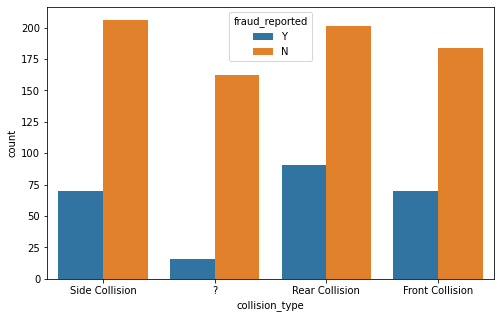

In [30]:
plt.figure(figsize=(8,5))
sns.countplot('collision_type',hue='fraud_reported',data=data)

<AxesSubplot:xlabel='incident_severity', ylabel='count'>

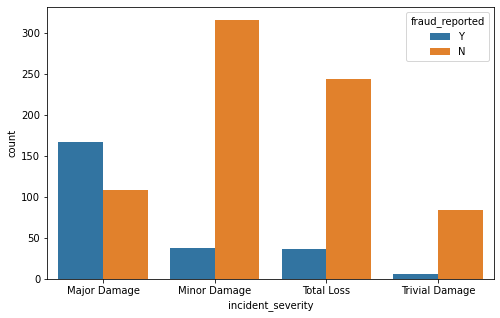

In [31]:
plt.figure(figsize=(8,5))
sns.countplot('incident_severity',hue='fraud_reported',data=data)

<AxesSubplot:xlabel='authorities_contacted', ylabel='count'>

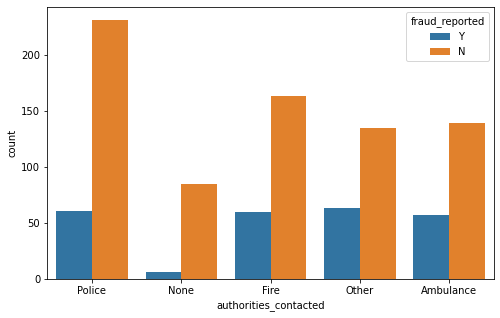

In [32]:
plt.figure(figsize=(8,5))
sns.countplot('authorities_contacted',hue='fraud_reported',data=data)

<AxesSubplot:xlabel='incident_state', ylabel='count'>

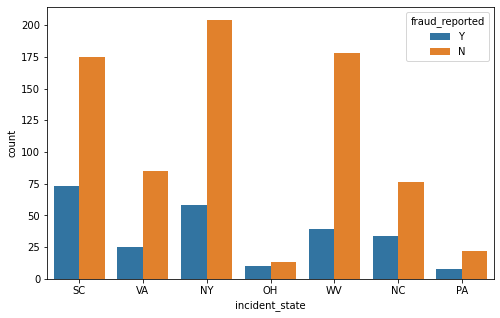

In [33]:
plt.figure(figsize=(8,5))
sns.countplot('incident_state',hue='fraud_reported',data=data)

<AxesSubplot:xlabel='incident_city', ylabel='count'>

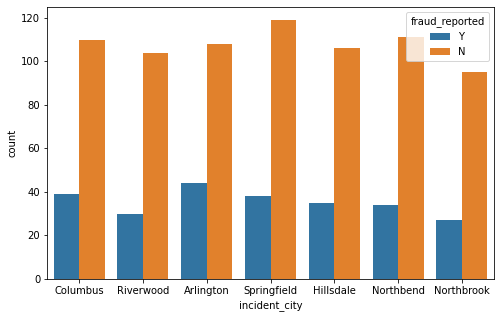

In [34]:
plt.figure(figsize=(8,5))
sns.countplot('incident_city',hue='fraud_reported',data=data)

<AxesSubplot:xlabel='property_damage', ylabel='count'>

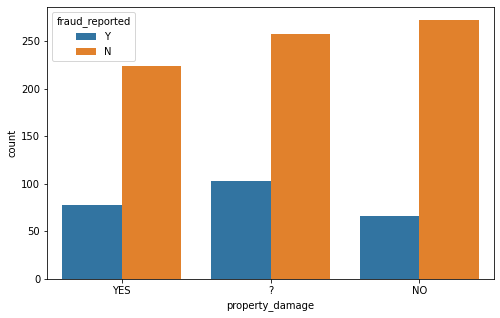

In [35]:
plt.figure(figsize=(8,5))
sns.countplot('property_damage',hue='fraud_reported',data=data)

<AxesSubplot:xlabel='police_report_available', ylabel='count'>

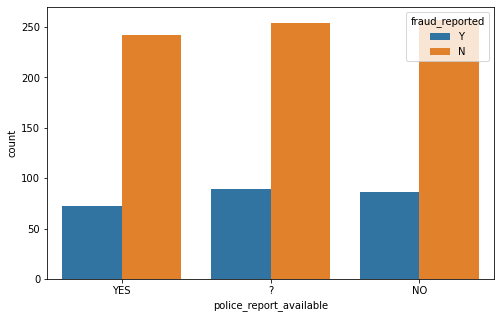

In [36]:
plt.figure(figsize=(8,5))
sns.countplot('police_report_available',hue='fraud_reported',data=data)

<AxesSubplot:xlabel='auto_make', ylabel='count'>

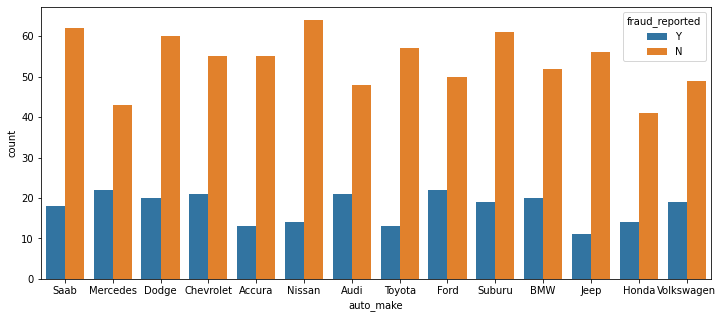

In [37]:
plt.figure(figsize=(12,5))
sns.countplot('auto_make',hue='fraud_reported',data=data)

<AxesSubplot:xlabel='auto_model', ylabel='count'>

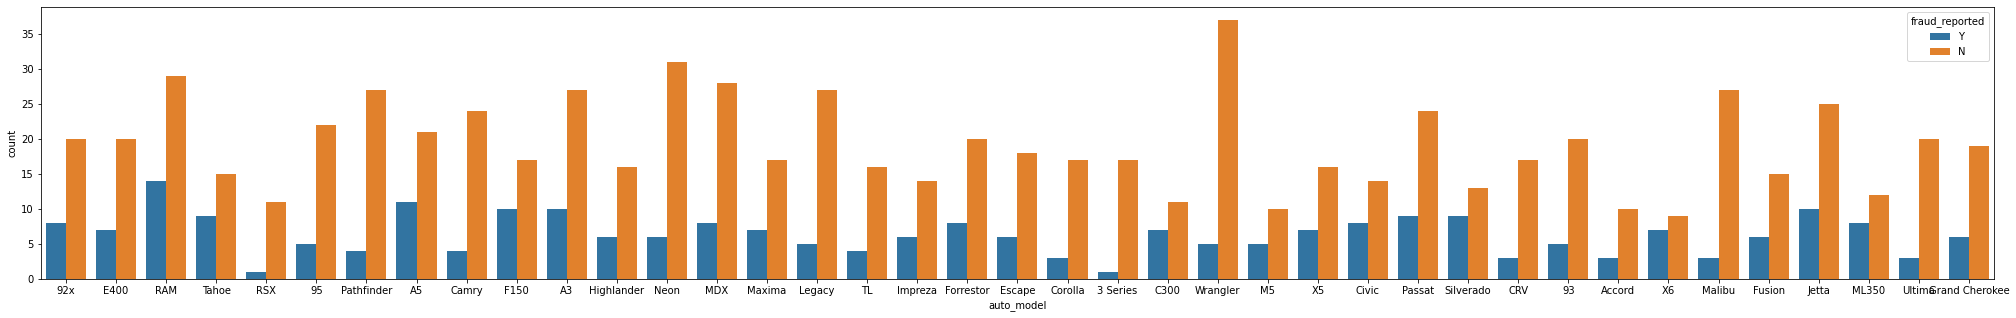

In [38]:
plt.figure(figsize=(35,5))
sns.countplot('auto_model',hue='fraud_reported',data=data)

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

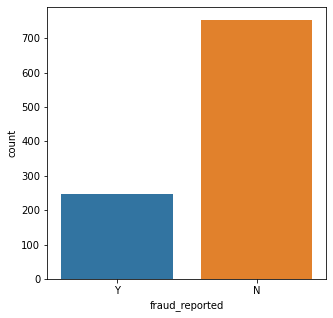

In [39]:
plt.figure(figsize=(5,5))
sns.countplot('fraud_reported',data=data)

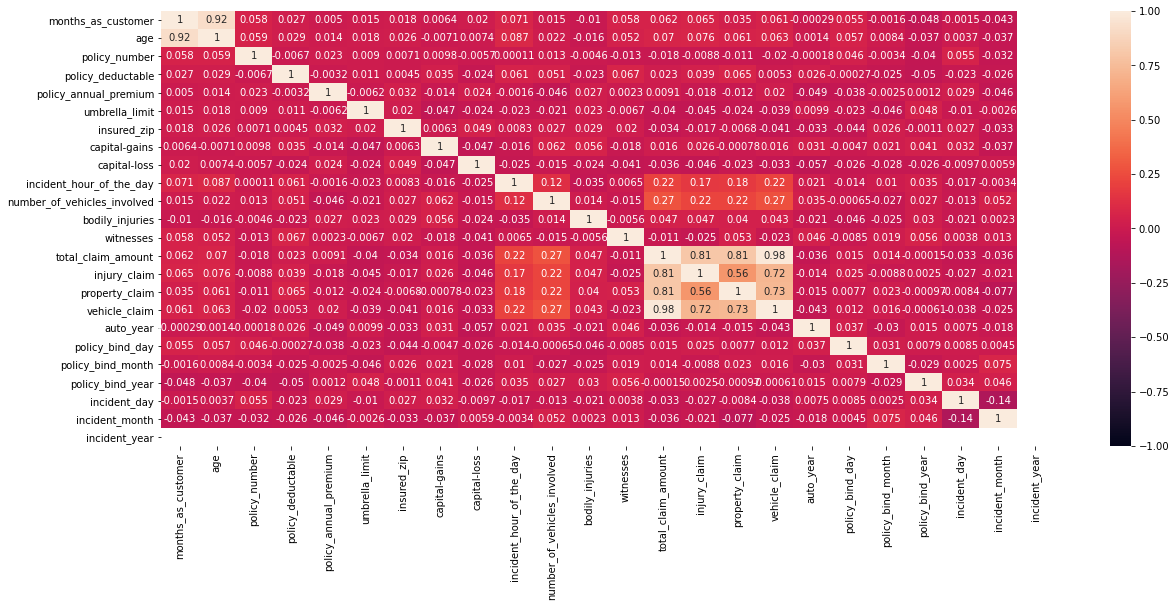

In [40]:
#coorelation matrix
plt.figure(figsize=(20,8))
sns.heatmap(data.corr(),vmin=-1,vmax=1,annot=True)
plt.show()

<AxesSubplot:xlabel='months_as_customer'>

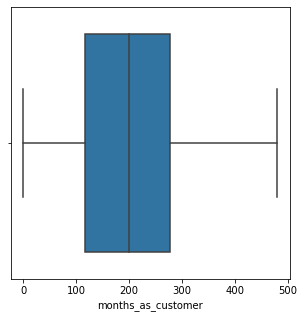

In [41]:
plt.figure(figsize=(5,5))
sns.boxplot('months_as_customer',data=data)

<AxesSubplot:xlabel='age'>

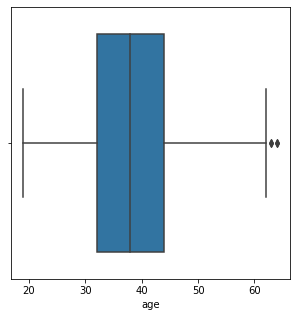

In [42]:
plt.figure(figsize=(5,5))
sns.boxplot('age',data=data)

<AxesSubplot:xlabel='policy_number'>

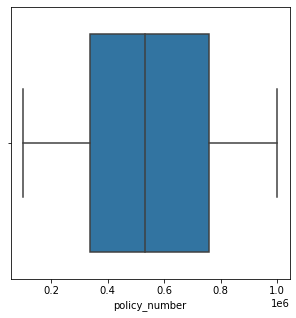

In [43]:
plt.figure(figsize=(5,5))
sns.boxplot('policy_number',data=data)

<AxesSubplot:xlabel='policy_deductable'>

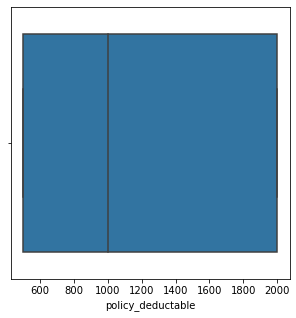

In [44]:
plt.figure(figsize=(5,5))
sns.boxplot('policy_deductable',data=data)

<AxesSubplot:xlabel='policy_annual_premium'>

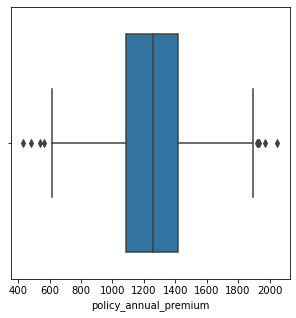

In [45]:
plt.figure(figsize=(5,5))
sns.boxplot('policy_annual_premium',data=data)

<AxesSubplot:xlabel='umbrella_limit'>

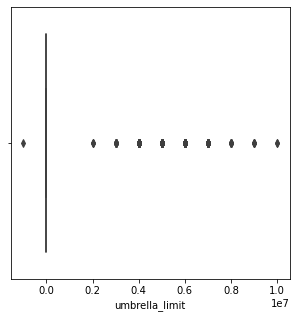

In [46]:
plt.figure(figsize=(5,5))
sns.boxplot('umbrella_limit',data=data)

<AxesSubplot:xlabel='insured_zip'>

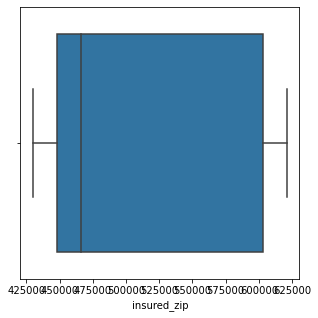

In [47]:
plt.figure(figsize=(5,5))
sns.boxplot('insured_zip',data=data)

<AxesSubplot:xlabel='capital-gains'>

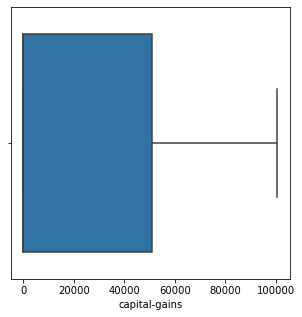

In [48]:
plt.figure(figsize=(5,5))
sns.boxplot('capital-gains',data=data)

<AxesSubplot:xlabel='capital-loss'>

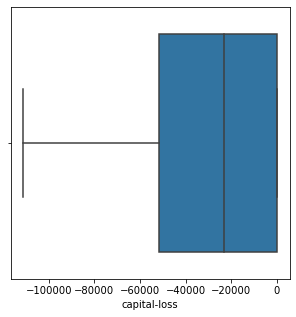

In [49]:
plt.figure(figsize=(5,5))
sns.boxplot('capital-loss',data=data)

<AxesSubplot:xlabel='incident_hour_of_the_day'>

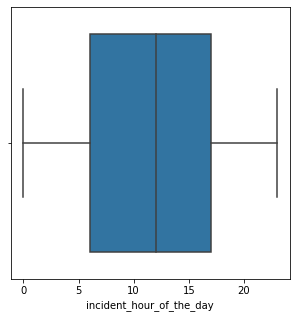

In [50]:
plt.figure(figsize=(5,5))
sns.boxplot('incident_hour_of_the_day',data=data)

<AxesSubplot:xlabel='number_of_vehicles_involved'>

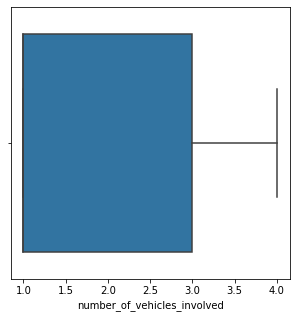

In [51]:
plt.figure(figsize=(5,5))
sns.boxplot('number_of_vehicles_involved',data=data)

<AxesSubplot:xlabel='bodily_injuries'>

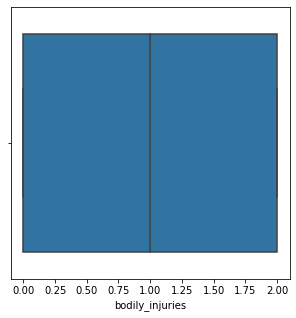

In [52]:
plt.figure(figsize=(5,5))
sns.boxplot('bodily_injuries',data=data)

<AxesSubplot:xlabel='witnesses'>

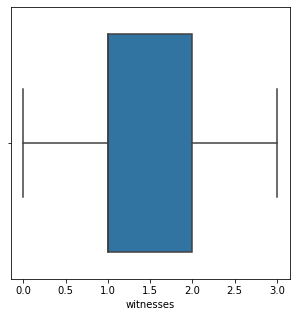

In [53]:
plt.figure(figsize=(5,5))
sns.boxplot('witnesses',data=data)

<AxesSubplot:xlabel='total_claim_amount'>

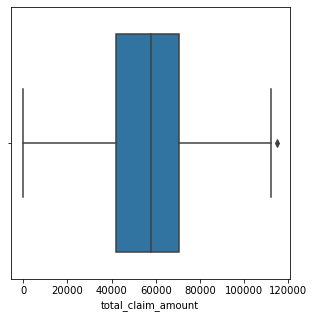

In [54]:
plt.figure(figsize=(5,5))
sns.boxplot('total_claim_amount',data=data)

<AxesSubplot:xlabel='injury_claim'>

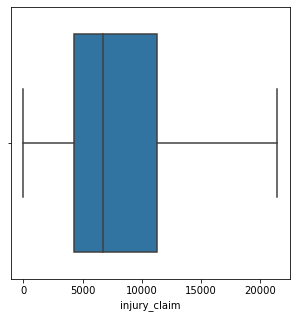

In [55]:
plt.figure(figsize=(5,5))
sns.boxplot('injury_claim',data=data)

<AxesSubplot:xlabel='property_claim'>

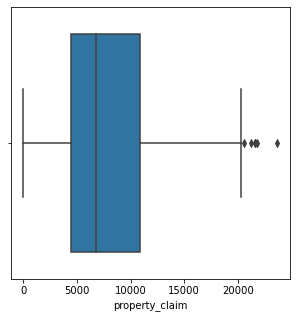

In [56]:
plt.figure(figsize=(5,5))
sns.boxplot('property_claim',data=data)

<AxesSubplot:xlabel='vehicle_claim'>

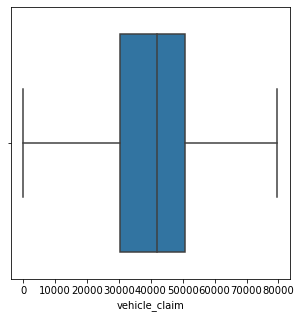

In [57]:
plt.figure(figsize=(5,5))
sns.boxplot('vehicle_claim',data=data)

<AxesSubplot:xlabel='auto_year'>

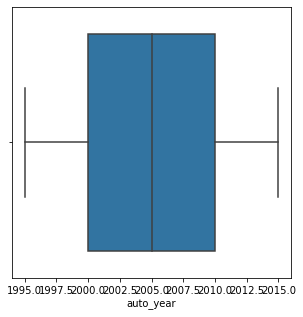

In [58]:
plt.figure(figsize=(5,5))
sns.boxplot('auto_year',data=data)

<AxesSubplot:xlabel='policy_bind_day'>

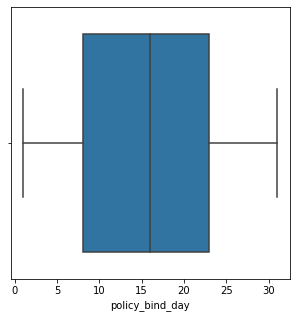

In [59]:
plt.figure(figsize=(5,5))
sns.boxplot('policy_bind_day',data=data)

<AxesSubplot:xlabel='policy_bind_month'>

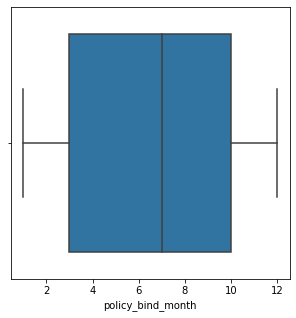

In [60]:
plt.figure(figsize=(5,5))
sns.boxplot('policy_bind_month',data=data)

<AxesSubplot:xlabel='policy_bind_year'>

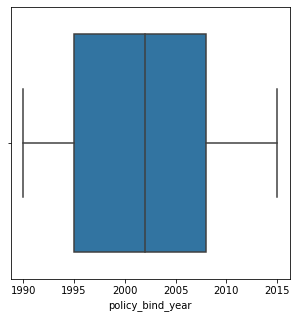

In [61]:
plt.figure(figsize=(5,5))
sns.boxplot('policy_bind_year',data=data)

<AxesSubplot:xlabel='incident_day'>

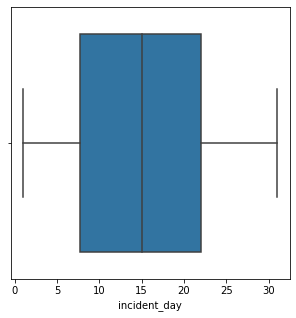

In [62]:
plt.figure(figsize=(5,5))
sns.boxplot('incident_day',data=data)

<AxesSubplot:xlabel='incident_month'>

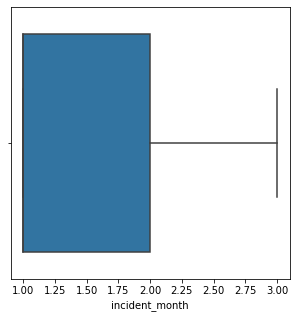

In [63]:
plt.figure(figsize=(5,5))
sns.boxplot('incident_month',data=data)

<AxesSubplot:xlabel='incident_year'>

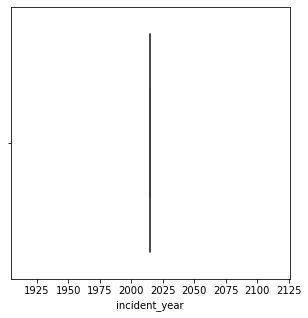

In [64]:
plt.figure(figsize=(5,5))
sns.boxplot('incident_year',data=data)

In [65]:
data.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
policy_bind_day                0.053237
policy_bind_month             -0.016994
policy_bind_year               0.052511
incident_day                   0.039711
incident_month                 0.267378
incident_year                  0.000000
dtype: float64

In [66]:
# converting of categorical column into numerical form
data['policy_state']=data['policy_state'].replace({'OH':0,'IL':1,'IN':2})

In [67]:
data['insured_sex']=data['insured_sex'].replace({'FEMALE':0,'MALE':1})

In [68]:
for i in data.columns:
    if data[i].dtype==object:
        print(str(i)+" : "+str(data[i].unique()))
        print(data[i].value_counts())
        print('...................................')

policy_csl : ['250/500' '100/300' '500/1000']
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64
...................................
insured_education_level : ['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
...................................
insured_occupation : ['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']
machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
priv-house-serv      71
other-service        71
armed-forces         69
adm-clerical         65
protective-ser

In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [70]:
cat

['policy_state',
 'policy_csl',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'incident_location',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model',
 'fraud_reported']

In [71]:
dummies=pd.get_dummies(data,columns=['policy_csl','insured_education_level','insured_occupation','insured_hobbies','insured_relationship','incident_type','collision_type','incident_severity','authorities_contacted','incident_state','incident_city','incident_location','property_damage','police_report_available','auto_make','auto_model'],drop_first=True)

In [72]:
dummies

months_as_customer  age  policy_number  policy_state  policy_deductable  \
0                   328   48         521585             0               1000   
1                   228   42         342868             2               2000   
2                   134   29         687698             0               2000   
3                   256   41         227811             1               2000   
4                   228   44         367455             1               1000   
..                  ...  ...            ...           ...                ...   
995                   3   38         941851             0               1000   
996                 285   41         186934             1               1000   
997                 130   34         918516             0                500   
998                 458   62         533940             1               2000   
999                 456   60         556080             0               1000   

     policy_annual_premium  umbrella_limit  insured_zip  insured_sex  \
0                  1406.91               0       466132            1   
1                  1197.22         5000000       468176            1   
2                  1413.14         5000000       430632            0   
3                  1415.74         6000000       608117            0   
4                  1583.91         6000000       610706            1   
..                     ...             ...          ...          ...   
995                1310.80               0       431289            0   
996                1436.79               0       608177            0   
997                1383.49         3000000       442797            0   
998                1356.92         5000000       441714            1   
999                 766.19               0       612260            0   

     capital-gains  capital-loss  incident_hour_of_the_day  \
0            53300             0                         5   
1                0             0                         8   
2            35100             0                         7   
3            48900        -62400                         5   
4            66000        -46000                        20   
..             ...           ...                       ...   
995              0             0                        20   
996          70900             0                        23   
997          35100             0                         4   
998              0             0                         2   
999              0             0                         6   

     number_of_vehicles_involved  bodily_injuries  witnesses  \
0                              1                1          2   
1                              1                0          0   
2                              3                2          3   
3                              1                1          2   
4                              1                0          1   
..                           ...              ...        ...   
995                            1                0          1   
996                            1                2          3   
997                            3                2          3   
998                            1                0          1   
999                            1                0          3   

     total_claim_amount  injury_claim  property_claim  vehicle_claim  \
0                 71610          6510           13020          52080   
1                  5070           780             780           3510   
2                 34650          7700            3850          23100   
3                 63400          6340            6340          50720   
4                  6500          1300             650           4550   
..                  ...           ...             ...            ...   
995               87200         17440            8720          61040   
996              108480         18080           18080          72320   
997              

In [73]:
merged=pd.concat([data,dummies],axis='columns')
merged

months_as_customer  age  policy_number  policy_state policy_csl  \
0                   328   48         521585             0    250/500   
1                   228   42         342868             2    250/500   
2                   134   29         687698             0    100/300   
3                   256   41         227811             1    250/500   
4                   228   44         367455             1   500/1000   
..                  ...  ...            ...           ...        ...   
995                   3   38         941851             0   500/1000   
996                 285   41         186934             1    100/300   
997                 130   34         918516             0    250/500   
998                 458   62         533940             1   500/1000   
999                 456   60         556080             0    250/500   

     policy_deductable  policy_annual_premium  umbrella_limit  insured_zip  \
0                 1000                1406.91               0       466132   
1                 2000                1197.22         5000000       468176   
2                 2000                1413.14         5000000       430632   
3                 2000                1415.74         6000000       608117   
4                 1000                1583.91         6000000       610706   
..                 ...                    ...             ...          ...   
995               1000                1310.80               0       431289   
996               1000                1436.79               0       608177   
997                500                1383.49         3000000       442797   
998               2000                1356.92         5000000       441714   
999               1000                 766.19               0       612260   

     insured_sex insured_education_level insured_occupation insured_hobbies  \
0              1                      MD       craft-repair        sleeping   
1              1                      MD  machine-op-inspct         reading   
2              0                     PhD              sales     board-games   
3              0                     PhD       armed-forces     board-games   
4              1               Associate              sales     board-games   
..           ...                     ...                ...             ...   
995            0                 Masters       craft-repair       paintball   
996            0                     PhD     prof-specialty        sleeping   
997            0                 Masters       armed-forces  bungie-jumping   
998            1               Associate  handlers-cleaners    base-jumping   
999            0               Associate              sales        kayaking   

    insured_relationship  capital-gains  capital-loss  \
0                husband          53300             0   
1         other-relative              0             0   
2              own-child          35100             0   
3              unmarried          48900        -62400   
4              unmarried          66000        -46000   
..                   ...            ...           ...   
995            unmarried              0             0   
996                 wife          70900             0   
997       other-relative          35100             0   
998                 wife              0             0   
999              husband              0             0   

                incident_type   collision_type incident_severity  \
0    Single Vehicle Collision   Side Collision      Major Damage   
1               Vehicle Theft                ?      Minor Damage   
2     Multi-vehicle Collision   Rear Collision      Minor Damage   
3    Single Vehicle Collision  Front Collision      Major Damage   
4               Vehicle Theft                ?      Minor Damage   
..                        ...              ...               ...   
995  Single Vehicle Collision  Front Collision      Minor Damage   
996  Single Vehicle Colli

In [74]:
data_final=merged.drop(columns=['policy_csl','insured_education_level','insured_occupation','insured_hobbies','insured_relationship','incident_type','collision_type','incident_severity','authorities_contacted','incident_state','incident_city','incident_location','property_damage','police_report_available','auto_make','auto_model'],axis=1)
data_final

months_as_customer  age  policy_number  policy_state  policy_deductable  \
0                   328   48         521585             0               1000   
1                   228   42         342868             2               2000   
2                   134   29         687698             0               2000   
3                   256   41         227811             1               2000   
4                   228   44         367455             1               1000   
..                  ...  ...            ...           ...                ...   
995                   3   38         941851             0               1000   
996                 285   41         186934             1               1000   
997                 130   34         918516             0                500   
998                 458   62         533940             1               2000   
999                 456   60         556080             0               1000   

     policy_annual_premium  umbrella_limit  insured_zip  insured_sex  \
0                  1406.91               0       466132            1   
1                  1197.22         5000000       468176            1   
2                  1413.14         5000000       430632            0   
3                  1415.74         6000000       608117            0   
4                  1583.91         6000000       610706            1   
..                     ...             ...          ...          ...   
995                1310.80               0       431289            0   
996                1436.79               0       608177            0   
997                1383.49         3000000       442797            0   
998                1356.92         5000000       441714            1   
999                 766.19               0       612260            0   

     capital-gains  capital-loss  incident_hour_of_the_day  \
0            53300             0                         5   
1                0             0                         8   
2            35100             0                         7   
3            48900        -62400                         5   
4            66000        -46000                        20   
..             ...           ...                       ...   
995              0             0                        20   
996          70900             0                        23   
997          35100             0                         4   
998              0             0                         2   
999              0             0                         6   

     number_of_vehicles_involved  bodily_injuries  witnesses  \
0                              1                1          2   
1                              1                0          0   
2                              3                2          3   
3                              1                1          2   
4                              1                0          1   
..                           ...              ...        ...   
995                            1                0          1   
996                            1                2          3   
997                            3                2          3   
998                            1                0          1   
999                            1                0          3   

     total_claim_amount  injury_claim  property_claim  vehicle_claim  \
0                 71610          6510           13020          52080   
1                  5070           780             780           3510   
2                 34650          7700            3850          23100   
3                 63400          6340            6340          50720   
4                  6500          1300             650           4550   
..                  ...           ...             ...            ...   
995               87200         17440            8720          61040   
996              108480         18080           18080          72320   
997              

In [75]:
x=data_final.drop(columns=data_final['fraud_reported'],axis=1)

In [76]:
y=data['fraud_reported']

In [77]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [78]:
y=le.fit_transform(data['fraud_reported'])

In [79]:
from sklearn.preprocessing import StandardScaler

In [80]:
scaler=StandardScaler()

In [81]:
X_scaled=scaler.fit_transform(x)

In [177]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV

In [178]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.30,random_state=55)

In [179]:
from sklearn.ensemble import ExtraTreesRegressor
selection=ExtraTreesRegressor()
selection.fit(X_scaled,y)

ExtraTreesRegressor()

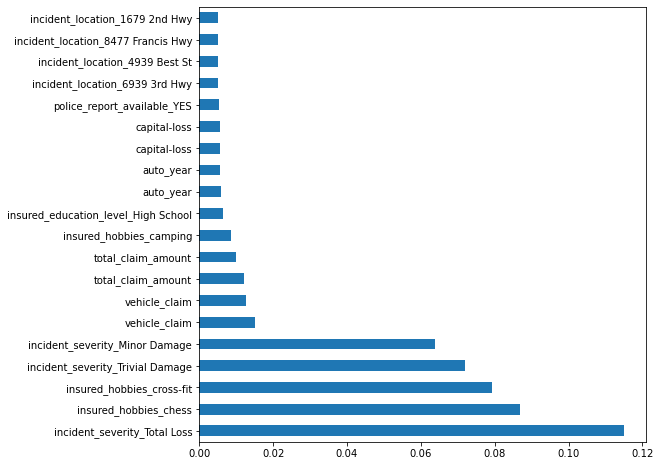

In [180]:
plt.figure(figsize=(8,8))
feat_importances=pd.Series(selection.feature_importances_,index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [181]:
from sklearn.linear_model import LogisticRegression

In [182]:
lr=LogisticRegression()

In [183]:
lr.fit(x_train,y_train)

LogisticRegression()

In [184]:
lr_pred=lr.predict(x_test)

In [185]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score

In [186]:
accuracy=accuracy_score(y_test,lr_pred)
accuracy

0.77

In [187]:
lr_cross_score=cross_val_score(lr,x,y,cv=5,scoring='accuracy').mean()
lr_cross_score

0.747

In [188]:
from sklearn.neighbors import KNeighborsClassifier

In [189]:
knn=KNeighborsClassifier()

In [190]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [191]:
knn_pred=knn.predict(x_test)

In [192]:
accuracy=accuracy_score(y_test,knn_pred)
accuracy

0.71

In [193]:
knn_cross_score=cross_val_score(knn,x,y,cv=5,scoring='accuracy').mean()
knn_cross_score

0.704

In [194]:
from sklearn.svm import SVC

In [195]:
svc=SVC()

In [196]:
svc.fit(x_train,y_train)

SVC()

In [197]:
svc_pred=svc.predict(x_test)

In [198]:
accuracy=accuracy_score(y_test,svc_pred)
accuracy

0.7533333333333333

In [199]:
svc_cross_score=cross_val_score(svc,x,y,cv=5,scoring='accuracy').mean()
svc_cross_score

0.7529999999999999

In [200]:
svc=SVC()

svc.fit(x_train, y_train)
y_pred_train = svc.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test =svc.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9985714285714286
Test accuracy is 0.7533333333333333
[[226   0]
 [ 74   0]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86       226
           1       0.00      0.00      0.00        74

    accuracy                           0.75       300
   macro avg       0.38      0.50      0.43       300
weighted avg       0.57      0.75      0.65       300



In [201]:
from sklearn.tree import DecisionTreeClassifier

In [202]:
dt=DecisionTreeClassifier()

In [203]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [204]:
dt_pred=dt.predict(x_test)

In [205]:
accuracy=accuracy_score(y_test,dt_pred)
accuracy

0.8333333333333334

In [206]:
dt_cross_score=cross_val_score(dt,x,y,cv=5,scoring='accuracy').mean()
dt_cross_score

0.826

In [207]:
from sklearn.ensemble import RandomForestClassifier

In [208]:
RF = RandomForestClassifier()

In [209]:
RF.fit(x_train,y_train)

RandomForestClassifier()

In [210]:
rf_pred=RF.predict(x_test)

In [211]:
accuracy=accuracy_score(y_test,rf_pred)
accuracy

0.7533333333333333

In [212]:
rf_cross_score=cross_val_score(rf,x,y,cv=5,scoring='accuracy').mean()
rf_cross_score

0.7529999999999999

In [213]:
RF = RandomForestClassifier()

RF.fit(x_train, y_train)
y_pred_train = RF.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = RF.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 1.0
Test accuracy is 0.7533333333333333
[[226   0]
 [ 74   0]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86       226
           1       0.00      0.00      0.00        74

    accuracy                           0.75       300
   macro avg       0.38      0.50      0.43       300
weighted avg       0.57      0.75      0.65       300



In [214]:
rf=RandomForestClassifier()

params={'n_estimators':[13,15],
        'criterion':['entropy'],
        'max_depth':[10,15],
        'min_samples_split':[10,11],
        'min_samples_leaf':[5,6]}
grd=GridSearchCV(rf,param_grid=params,cv=5,n_jobs=-1)
grd.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [10, 15],
                         'min_samples_leaf': [5, 6],
                         'min_samples_split': [10, 11],
                         'n_estimators': [13, 15]})

In [215]:
best_parameters=grd.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 6, 'min_samples_split': 11, 'n_estimators': 13}


In [216]:
grd.best_score_

0.7585714285714286

In [219]:
from sklearn.metrics import plot_roc_curve

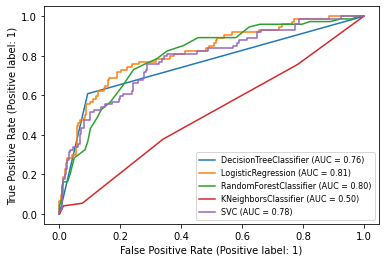

In [222]:
disp=plot_roc_curve(dt,x_test,y_test)
plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)
plot_roc_curve(RF,x_test,y_test,ax=disp.ax_)
plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':8},loc='lower right')
plt.show()

In [223]:
import joblib
joblib.dump(RF,"Insurance_Fraud.pkl")

['Insurance_Fraud.pkl']